![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Working With Open Data Part 5:  Meteorite Landings and Falls Part 2

Now that we've learned how to use Jupyter notebooks to create maps using geo-spacial data, and how create interactive widgets, let's dive into some data analysis. This is a rather rich data set, and we may be able to draw some interesting conclusions from the data. To begin, we have to first gather our libraries and data set in this notebook.

# Travailler avec des données ouvertes Partie 5: Atterrissages de météorites et chutes Partie 2

Maintenant que nous avons appris à utiliser les blocs-notes Jupyter pour créer des cartes à l'aide de données géo-spatiales et à créer des widgets interactifs, analysons certaines données. Cet ensemble de données est plutôt riche et nous pouvons tirer des conclusions intéressantes des données. Pour commencer, nous devons d'abord rassembler nos bibliothèques et l'ensemble de données dans ce cahier.

In [1]:
'''
This is exactly what we did in the previous notebook: just getting the data again
'''

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# numerical python library
import numpy as np
url = 'https://github.com/fleiser/Meteorite-landings/raw/master/Meteorite_Landings.csv'
landings = pd.read_csv(url)




# Deeper Data Analysis

This data set contains more than the geo-location of meteorite falls. It also contains information about if they were found or not, and quantifications such as the meteorite type and the mass . As such, it is of interest to explore these results  further, perhaps there are interesting trends within the data - waiting for us to discover them. 


First things first; let's calculate the percentage of meteorites  found vs the total meteorites that fell



# Analyse de données plus approfondie

Cet ensemble de données contient plus que la géo-localisation des chutes de météorites. Il contient également des informations sur leur présence ou non, et des quantifications telles que le type de météorite et la masse. En tant que tel, il est intéressant d’explorer davantage ces résultats, peut-être y a-t-il des tendances intéressantes dans les données - en attendant que nous les découvrions.


Les premières choses d'abord calculons le pourcentage de météorites trouvées par rapport aux météorites totales qui sont tombées

In [2]:
a = len(landings[landings['fall'] == "Fell"])
b = len(landings[landings['fall'] == "Found"])
print("Percentage of fallen meteorites found:", b/(a+b) * 100, '%')

Percentage of fallen meteorites found: 97.57847533632287 %


Interestingly, it appears that the majority of meteorites that fall are actually found. Do the meteorites left undiscovered have any distinguishing properties? There are external factors such as the geography or isolation where the meteorite fell making it difficult to find. But, perhaps there are also some internal factors that contribute to their difficulty to find? The data contains several properties such as the mass and type of each meteorite. Using these properties, lets create some visualizations to try and deduce any properties that may dictate if a meteorite is located or not.

## Histograms

In this case, a potential quantity of interest is the mass of the meteorites that fall. Perhaps there is some relationship between how massive a meteorite, and how likely it is to be found? Let's create a histogram of the masses of both "Found" and "Fell" meteorites. 

Il est intéressant de noter que la majorité des météorites qui tombent sont effectivement trouvées. Les météorites laissées inconnues ont-elles des propriétés distinctives? Il y a des facteurs externes tels que la géographie ou l'isolement où la météorite est tombée, ce qui la rend difficile à trouver. Mais peut-être y a-t-il aussi des facteurs internes qui contribuent à leur difficulté à trouver? Les données contiennent plusieurs propriétés telles que la masse et le type de chaque météorite. En utilisant ces propriétés, créons des visualisations pour essayer de déduire les propriétés pouvant déterminer si une météorite est située ou non.

## Histogrammes

Dans ce cas, une quantité potentielle d'intérêt est la masse des météorites qui tombent. Peut-être y a-t-il une relation entre la taille d'une météorite et sa probabilité de découverte? Créons un histogramme des masses des météorites "Found" et "Fell".

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


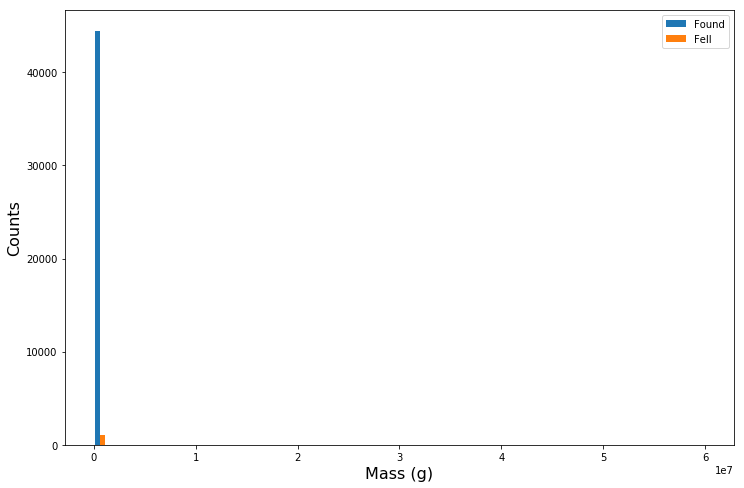

In [3]:
# This filters down our data frame to just rows where 'fall' is 'Fell' or "Found", and then
# by typing ['mass (g)'] after wards, we're only grabbing the mass column and assigning 
# them to a new variable. 

mass_fell = landings[landings['fall'] == "Fell"]['mass (g)']
mass_found = landings[landings['fall'] == "Found"]['mass (g)']

# Here we're dropping any potential NaN values we've seen before from our columns to prevent 
# any errors when plotting. To see the error that will show, simply remove the .dropna() 

mass_fell = mass_fell.dropna()
mass_found = mass_found.dropna()

# Make a list of data to plot
plot_data = [mass_found, mass_fell]


'''
Here we create a histogram. 

bins  : This key word specifies how many bins to put the data in for the histogram

label : This is to specify the labels for each of the bars in the histogram.  
'''

# This is another way of setting the figure size. 
plt.figure(figsize=(12,8))

plt.hist(plot_data, bins = 50, label = ["Found", "Fell"])

plt.xlabel("Mass (g)", size = 16)
plt.ylabel("Counts", size = 16)
# Uncomment the line below to see a few more bars in the histogram by changing the y axes range.
# plt.ylim([0,10])
plt.legend()
plt.show()

Well, that's a peculiar histogram that doesn't tell us much. Unfortunately, this is a consequence of having a large range of meteorite masses. We have some incredibly massive meteorites, but we also have a great deal more  small mass meteorites. The spread in values of meteorite mass makes it difficult to bin the data to create a histogram. However, that's something we can absolutely deal with! Almost any time you're dealing with data with a range too large to bin  take the logarithm of the data  to "squish" the data into a more condensed range. 

Eh bien, c'est un histogramme particulier qui ne nous dit pas grand chose. Malheureusement, cela est la conséquence de la grande diversité de masses de météorites. Nous avons des météorites incroyablement massives, mais nous avons aussi beaucoup plus de petites météorites de masse. La diffusion des valeurs de la masse de météorites rend difficile l’assemblage des données pour créer un histogramme. Cependant, c'est une chose à laquelle nous pouvons absolument faire face! Presque chaque fois que vous traitez avec des données dont la plage est trop grande, prenez le logarithme des données pour "écraser" les données dans une plage plus condensée.

In [4]:
# Note log10 is log base ten. Simply typing 'log' will be the natural logarithm 
# The other logarithm included in numpy is log2 for log base two. Any other logarithms
# (in the event that you need them) will have to be calculated using properties of logarithms. 

mass_fell_log = np.log10(landings[landings['fall'] == "Fell"]['mass (g)'].dropna())
mass_found_log = np.log10(landings[landings['fall'] == "Found"]['mass (g)'].dropna())



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Uh oh! We got a runtime warning. Specifically, a divide by zero encountered in `log10`. This error is telling us is that we have submitted "bad" values into the logarithm; in particular there are some meteorites with zero mass. In this case, we'll filter those out by adding another case to our filter where we're finding "Fell" and "Found" meteorites. 

In [5]:
# Here we're simply saying that the mass of the meteorite should also be greater than zero!

mass_fell_log = np.log10(landings[(landings['fall'] == "Fell") &
                                  (landings["mass (g)"] > 0)]['mass (g)'].dropna())

mass_found_log = np.log10(landings[(landings['fall'] == "Found") &
                                   (landings["mass (g)"] > 0)]['mass (g)'].dropna())


Wonderful! By excluding meteorites with no recorded mass, we've fixed our error. Now, let's get to plotting these two quantities in a histogram now that we've taken the logarithm.

Formidable! En excluant les météorites sans masse enregistrée, nous avons corrigé notre erreur. Maintenant, passons au traçage de ces deux quantités dans un histogramme maintenant que nous avons pris le logarithme.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


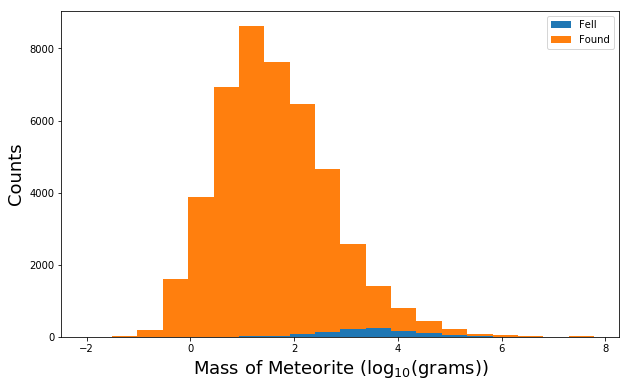

In [6]:
data_for_plot = [mass_fell_log, mass_found_log]

plt.figure(figsize = (10,6))

'''
stacked = True : Tells Python we want these plots "on top of eachother". Feel free to change it to
                 False to see the difference! 
'''
plt.hist(data_for_plot, 
         bins = 20,
         stacked = True,
         label = ["Fell", "Found"])

plt.ylabel( "Counts", size = 18)
plt.xlabel("Mass of Meteorite (log$_{10}$(grams))", size = 18)
plt.legend()
plt.show()

Where we see that there seems to be some differences in the distributions. Due to difference the scale of our counts, its difficult to compare the two distributions. Not to worry! We simply have to convert from "counts" to "percentages" for each to put them on the same scale. This can be considered a form of normalization. To do that, we have to use a few more hidden arguments of the histogram `hist` function from `matplotlib`. 

Où nous voyons qu'il semble y avoir des différences dans les distributions. En raison de la différence d’échelle de nos comptes, il est difficile de comparer les deux distributions. Ne pas s'inquiéter! Il suffit simplement de convertir les "dénombrements" en "pourcentages" pour les mettre à la même échelle. Cela peut être considéré comme une forme de normalisation. Pour ce faire, nous devons utiliser quelques arguments cachés de la fonction histogramme `hist` de` matplotlib`.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


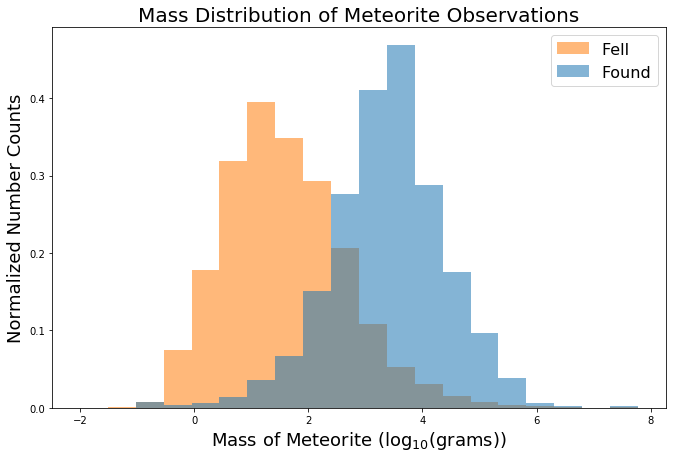

In [7]:

plt.figure(figsize=(11,7))


'''
Here the new arguments to hist are as follows

density  : By setting this true, this tells python to calculate "the percentage" of data within each bin
           to convert from raw counts to what can be considered a "probability density" instead. This allows
           both of our meteorite fall types to be on the same scale
          
histtype : This is a stylization parameter. "stepfilled" is simply telling Python that we want bars that look
           like "steps" and for them to be colored in. 
           
           you can also change this to ‘bar’, ‘barstacked’ or  ‘step' to see how the different plot styles 
           look. We note that some styles will affect the scaling. 

alpha    : This takes values from 0 -> 1 and are a measure of how transparent the traces are. 
'''

plt.hist(data_for_plot, 
         bins = 20, 
         density = True, 
         histtype='stepfilled', 
         alpha = 0.55,
         label = ["Found", "Fell"]) 


# The dollar signs allow us to use math symbols in the text. 
plt.xlabel("Mass of Meteorite (log$_{10}$(grams))", size = 18)
plt.ylabel("Normalized Number Counts", size = 18)
plt.title("Mass Distribution of Meteorite Observations", size = 20)

# The prop key word changes the 'proportions' of the legend. 
plt.legend(prop={'size': 16})
plt.show()

With this new scale, it seems to be the case that the more massive the meteorite is, the less likely it is to be found.

---

## Caution
Be aware of the scaling. It _appears_ to be much more likely that more massive meteorites are less likely to be found. But, keep in mind the blue histogram is only about 2.5% of all observed meteorites. 

---

### Interpretation

The appearance that the more massive a meteorite is the less likely it is to be found seems counter intuitive. This is actually a result of both the effect of the atmosphere on large fast moving bodies, and a consequence of the definition of "Found" in this data set. 

In terms of the atmosphere, larger meteorites have a tendency to explode as they enter Earth's atmosphere. For example, in 2013 a rather large meteor exploded over Chelyabinsk Russia, and its fall can be seen in the YouTube video below.

Avec cette nouvelle échelle, il semble que plus la météorite est massive, moins elle est susceptible d’être trouvée.

---

## Mise en garde
Soyez conscient de la mise à l'échelle. Il semble <_> qu'il soit beaucoup plus probable que des météorites plus massives soient moins susceptibles d’être trouvées. Mais, gardez à l'esprit que l'histogramme bleu ne représente qu'environ 2,5% de toutes les météorites observées.

---

### Interprétation

L'apparence que plus une météorite est massive est faible, moins elle est susceptible d'être trouvée, semble contre-intuitive. Ceci est en réalité le résultat à la fois de l'effet de l'atmosphère sur de grands corps en mouvement rapide et d'une conséquence de la définition de "Found" dans cet ensemble de données.

En termes d'atmosphère, les plus grosses météorites ont tendance à exploser lorsqu'elles pénètrent dans l'atmosphère terrestre. Par exemple, en 2013, un météore plutôt important a explosé au-dessus de la Russie de Tcheliabinsk, et sa chute est visible dans la vidéo YouTube ci-dessous.

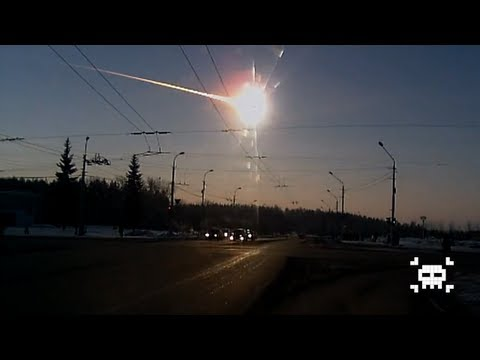

In [8]:
# This library allows us to embed YouTube in Jupyter. 
from IPython.display import YouTubeVideo

YouTubeVideo('fBLjB5qavxY',width=1024*0.75, height=576*0.75)

Despite all the video evidence of that meteor falling, if we look up this meteor in our data set, we will find something interesting. 

Malgré toutes les preuves vidéo de la chute de ce météore, si nous consultons ce météore dans notre ensemble de données, nous trouverons quelque chose d’intéressant.

In [9]:
landings[landings.name == 'Chelyabinsk']

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
194,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,01/01/2013 12:00:00 AM,54.81667,61.11667,"(54.816670, 61.116670)"


Despite the many angles available to see the meteor, it was never found? Why is that? Well, that gets us to the point of semantics. This meteor was an asteroid approximately 20 meters in width with a mass of greater than 10000 tonnes entering the atmosphere. However, only about 1000 kg of the meteor to date have been recovered. As a result, this meteor is classified as "fell" instead of found. Additionally, the recorded mass is only approximately what has been recovered so far. 


There is a relationship between mass of the meteorite and if it is found. But, this relationship is primarily due to the the greater likelihood of a large meteorite to explode, and the definition of "Found" requiring that the majority of the body to be recovered. 

For more information about meteorite explosions and the Chelyabinsk meteor see 

1. [The Wikipedia article](https://en.wikipedia.org/wiki/Chelyabinsk_meteor)
1. [This Science Alert Article](https://www.sciencealert.com/why-do-meteors-explode-when-they-reach-earth-atmosphere)

Certainly, there are other factors relating to why certain meteorites are found and some are not, than the mass of the meteorite such as geography, or if it was reported or not. Regardless, by exploring the relationship with mass, we were able to discover an interesting trend hidden within the data. 

# Conclusion

In this notebook we demonstrated how you might go about working with your data set  to tease out more interesting information in the data set. More importantly, we went through the steps to create a histogram and covered many potential problems you may encounter in doing so. We covered some common errors and more subtle problems when working with a data set with a large spread in values, and some solutions to those problems. We also covered how some interesting trends in data may have perfectly reasonable explanations that are less exciting than the data may lead us to believe. It is our hope that this tutorial series has left you feeling more confident when it comes to working with open data in Jupyter notebooks.

Malgré les nombreux angles disponibles pour voir le météore, il n'a jamais été retrouvé? Pourquoi donc? Eh bien, cela nous amène à la sémantique. Ce météore était un astéroïde d'environ 20 mètres de largeur avec une masse supérieure à 10 000 tonnes entrant dans l'atmosphère. Cependant, seulement environ 1000 kg du météore à ce jour ont été récupérés. En conséquence, ce météore est classé comme "tombé" au lieu d'être trouvé. De plus, la masse enregistrée n'est que approximativement ce qui a été récupéré jusqu'à présent.


Il y a une relation entre la masse de la météorite et si elle est trouvée. Cependant, cette relation est principalement due à la plus grande probabilité d’explosion d’une météorite de grande taille, et à la définition de «trouvé» exigeant la récupération de la majorité du corps.

Pour plus d'informations sur les explosions de météorites et les météores de Chelyabinsk, voir

1. [L'article de Wikipedia](https://fr.wikipedia.org/wiki/Superbolide_de_Tcheliabinsk)
1. [Cet article d'alerte scientifique](https://www.sciencealert.com/why-do-meteors-explode-when-they-reach-earth-atmosphere)

Certes, il existe d’autres facteurs liés à la présence de certaines météorites et d’autres, à la masse de la météorite telle que la géographie, ou si elle a été signalée ou non. Quoi qu’il en soit, en explorant la relation avec la masse, nous avons pu découvrir une tendance intéressante cachée dans les données.

# Conclusion

Dans ce cahier, nous avons montré comment vous pouvez travailler avec votre jeu de données pour obtenir des informations plus intéressantes dans le jeu de données. Plus important encore, nous avons suivi les étapes pour créer un histogramme et couvrir de nombreux problèmes potentiels que vous pourriez rencontrer en le faisant. Nous avons couvert certaines erreurs courantes et des problèmes plus subtils lorsque nous travaillions avec un ensemble de données avec un grand nombre de valeurs et certaines solutions à ces problèmes. Nous avons également expliqué comment certaines tendances intéressantes en matière de données peuvent avoir des explications parfaitement raisonnables et moins intéressantes que celles que les données peuvent nous laisser croire. Nous espérons que cette série de didacticiels vous permettra de vous sentir plus en confiance pour travailler avec des données ouvertes dans les ordinateurs portables Jupyter.

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)